In [2]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
hfi = erk.get_hfi_returns()

In [15]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


# Semi Deviation

In [5]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

Semi deviation is the volatility of the sub sample of below-average or below-zero Returns

$\sigma_{semi}= \sqrt{\frac{1}{n}x\Sigma_{r_t<Average}{n}(Average-r_t)^2}$

In [8]:
#Find the Semi deviation
hfi[hfi<0].std(ddof=0)  #Select only the Returns below Zero 

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [42]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [46]:
hfi2=hfi['2009':'2018']

In [53]:
erk.semideviation(hfi2)

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

# VaR and CVaR
Value At Risk

- Histotic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR


In [10]:
import numpy as np

In [11]:
np.percentile(hfi, 5, axis = 0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [19]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [21]:
from scipy.stats import norm

In [24]:
# z-score  Quatitile
z_score = norm.ppf(.05)
z_score 

-1.6448536269514729

Value At Risk at the 5% Level

In [29]:
hfi.mean()+z_score*hfi.std(ddof = 0)

Convertible Arbitrage    -0.021691
CTA Global               -0.034235
Distressed Securities    -0.021032
Emerging Markets         -0.047164
Equity Market Neutral    -0.008850
Event Driven             -0.021144
Fixed Income Arbitrage   -0.014579
Global Macro             -0.018766
Long/Short Equity        -0.026397
Merger Arbitrage         -0.010435
Relative Value           -0.013061
Short Selling            -0.080086
Funds Of Funds           -0.021292
dtype: float64

In [30]:
erk.VaR_gaussian(hfi,5)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

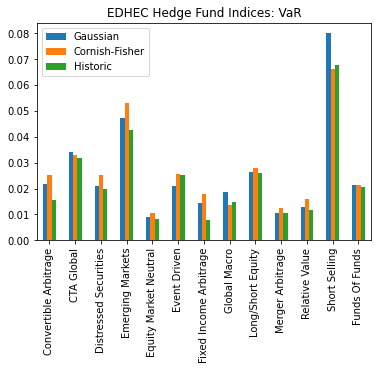

In [38]:
var_list = [erk.VaR_gaussian(hfi,5),
            erk.VaR_gaussian(hfi,5, modified=True),
           erk.var_historic(hfi)]
comparision = pd.concat(var_list, axis=1)
comparision.columns=['Gaussian', 'Cornish-Fisher','Historic']
comparision.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

### Beyond Var or Conditional Var
average of all the Returns that worst than VaR
- Average of the Loss if the 5% worst case happend

In [41]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64